# 장애인콜택시 대기시간 예측
## 단계3. 모델링

## 0.미션

* 1.시계열 데이터에 맞는 전처리
    * 데이터가 2015 ~ 2022년까지 데이터 입니다.
    * 이 중 2022년 10월 ~ 2022년 12월까지(3개월)의 데이터는 성능 검증용으로 사용합니다.
    * 나머지 데이터를 이용하여 학습 및 튜닝을 수행합니다.
    * 이를 위한 데이터 전처리를 수행하시오.
* 2.모델 최적화
    * 머신러닝 
        * 알고리즘 중 3가지 이상을 선정하여 모델링을 수행합니다.
        * 각각 알고리즘에 맞는 튜닝 방법으로 최적의 모델을 만듭니다.
    
    * 성능 평가
        * 시계열 그래프로 모델의 실제값과 예측값을 시각화하여 비교합니다.
        * 성능 지표 (MAE, MAPE) 를 사용해 가장 성능이 높은 모델을 선정합니다.
        * 성능 가이드
            * MAE : 4 ~ 6
            * MAPE : 0.09~0.14

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [1265]:
# path = 'C:/Users/User/project/'

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [1328]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1329]:
# path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [2477]:
# !pip install -r requirements.txt

#### 2) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [2478]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

In [2479]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

### (3) 데이터 불러오기
* 주어진 데이터셋
    * [2.탐색적 데이터분석] 단계에서 저장한 파일 : data2.pkl


In [2480]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data = joblib.load('data1.plk') 
data

,Date,taxi_count,call,catch,wait_time,cost,dist,week,month,year,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),weekday,season,holiday,week_dist_mean,catch_rate
0,2015-01-01,213,1023,924,23.2,2427,10764,1,1,2015,-2.0,-8.9,0.0,63.0,28.0,9.07,Thursday,Winter,1.0,10764.000000,0.903226
1,2015-01-02,420,3158,2839,17.2,2216,8611,1,1,2015,2.4,-9.2,0.0,73.0,37.0,8.66,Friday,Winter,0.0,9687.500000,0.898987
2,2015-01-03,209,1648,1514,26.2,2377,10198,1,1,2015,8.2,0.2,0.0,89.0,58.0,5.32,Saturday,Winter,0.0,9857.666667,0.918689
3,2015-01-04,196,1646,1526,24.5,2431,10955,1,1,2015,7.9,-0.9,0.0,95.0,52.0,6.48,Sunday,Winter,0.0,10132.000000,0.927096
4,2015-01-05,421,4250,3730,26.2,2214,8663,2,1,2015,4.1,-7.4,3.4,98.0,29.0,10.47,Monday,Winter,0.0,9838.200000,0.877647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,2022-12-27,669,5635,4654,44.4,2198,8178,52,12,2022,-0.3,-5.4,0.1,92.0,40.0,10.86,Tuesday,Winter,0.0,8567.285714,0.825909
2919,2022-12-28,607,5654,4648,44.8,2161,7882,52,12,2022,1.7,-7.8,0.0,71.0,34.0,10.88,Wednesday,Winter,0.0,8574.428571,0.822073
2920,2022-12-29,581,5250,4247,52.5,2229,8433,52,12,2022,2.1,-4.0,0.0,87.0,38.0,10.84,Thursday,Winter,0.0,8629.000000,0.808952
2921,2022-12-30,600,5293,4200,38.3,2183,8155,52,12,2022,-4.4,-4.4,0.0,66.0,66.0,0.00,Friday,Winter,0.0,8650.714286,0.793501


In [2481]:
data['weekend'] =  data['Date'].dt.weekday
data['weekend'] = data['weekend'].map(lambda x: 1 if x==5 or x==6 else 0 )

In [2482]:

data['rain'] = data['rain(mm)']
data['rain'] = data['rain'].map(lambda x: 1 if x>2 else 0 )
data['weekend'] =  data['Date'].dt.weekday
data['weekend'] = data['weekend'].map(lambda x: 1 if x==5 or x==6 else 0 )
data['cold'] = data['temp_max']
data['cold'] = data['temp_max'].map(lambda x: 1 if x<0 else 0 )
data['hot'] = data['temp_max']
data['hot'] = data['temp_max'].map(lambda x: 1 if x>31 else 0 )
data['catch_rate'] = (data['catch_rate']*10)**2
data['temp_min'] = data['temp_min'] + (data['temp_min']-10)

start_date = '2020-01-20'
end_date = '2023-05-11'
data['covid'] = 0  
data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date), 'covid'] = 1

def add_basic_fare(year):
    if 2012 == year:
        return 2400
    elif 2013 <= year <2019:
        return 3000
    elif year >= 2019:
        return 3800
    else:  # 나머지 경우는 0으로 처리
        return 0
data['기본요금'] = data['year'].apply(add_basic_fare)

In [2483]:
data['week_dist_mean_4'] = data['dist'].rolling(window=4,min_periods=1).mean()


In [2484]:

data['hot'] = data['temp_max']
data['hot'] = data['temp_max'].map(lambda x: 1 if x>31 else 0 )

In [2485]:
start_date = '2020-01-20'
end_date = '2023-05-11'

data['covid'] = 0  
data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date), 'covid'] = 1

In [2486]:
def add_basic_fare(year):
    if 2012 == year:
        return 2400
    elif 2013 <= year <2019:
        return 3000
    elif year >= 2019:
        return 3800
    else:  # 나머지 경우는 0으로 처리
        return 0

In [2487]:
data['기본요금'] = data['year'].apply(add_basic_fare)

## 2.데이터 준비
* **세부요구사항**
    * NaN에 대한 조치를 수행하시오.
        * rolling 혹은 shift로 발생된 초기 행의 NaN은 삭제해도 무방합니다.
    * 가변수화 : 범주형에 대해서 가변수화를 수행합니다.
    * 데이터분할
        * 시계열 데이터 특성에 맞게 분할합니다.
        * 마지막 91일(3개월) 데이터를 검증셋으로 사용합니다.

### (1) NA 조치

### (2) 가변수화

In [2488]:
pd.set_option("display.max_columns", 150)
pd.set_option("display.max_info_rows", 150)
data['day'] = data['Date'].dt.day

In [2489]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# data_f = data
data_f = pd.get_dummies(data, columns=['season'])
data_f.drop(['weekday'],axis=1,inplace=True)
date = data_f.drop('Date',axis=1,inplace=True)

In [2490]:
data_f.drop(['week', 'month','year','sunshine(MJ/m2)','기본요금','humidity_min(%)','humidity_max(%)','rain(mm)','day','week_dist_mean','hot','cold','catch','cost'],axis=1, inplace=True)


### (3) 데이터분할
* **세부요구사항**
    * 마지막 91일 간의 데이터를 검증 셋으로 만듭니다. (2022-10-01 ~ )
    * 이 기간의 날짜 리스트를 별도로 저장하여, 모델 검증시 시각화할 때 활용합니다.

In [2491]:
data_f

,taxi_count,call,wait_time,dist,temp_max,temp_min,holiday,catch_rate,weekend,rain,covid,week_dist_mean_4,season_Spring,season_Summer,season_Fall,season_Winter
0,213,1023,23.2,10764,-2.0,-27.8,1.0,81.581686,0,0,0,10764.000000,False,False,False,True
1,420,3158,17.2,8611,2.4,-28.4,0.0,80.817709,0,0,0,9687.500000,False,False,False,True
2,209,1648,26.2,10198,8.2,-9.6,0.0,84.399007,1,0,0,9857.666667,False,False,False,True
3,196,1646,24.5,10955,7.9,-11.8,0.0,85.950698,1,0,0,10132.000000,False,False,False,True
4,421,4250,26.2,8663,4.1,-24.8,0.0,77.026436,0,1,0,9606.750000,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,669,5635,44.4,8178,-0.3,-20.8,0.0,68.212649,0,0,1,9021.250000,False,False,False,True
2919,607,5654,44.8,7882,1.7,-25.6,0.0,67.580380,0,0,1,8540.250000,False,False,False,True
2920,581,5250,52.5,8433,2.1,-18.0,0.0,65.440395,0,0,1,8095.500000,False,False,False,True
2921,600,5293,38.3,8155,-4.4,-18.8,0.0,62.964360,0,0,1,8162.000000,False,False,False,True


#### 1) x, y 나누기

In [2492]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

x = data_f.drop('wait_time',axis=1)
y = data_f['wait_time']

#### 2) train : validation 나누기
* 힌트 : train_test_split(  ,   ,  test_size = 91, shuffle = False) 

In [2493]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 91, shuffle = False)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2832, 15)
(91, 15)
(2832,)
(91,)


### (4) Scaling
* KNN, SVM 알고리즘을 적용하기 위해서는 스케일링을 해야 합니다.

In [2494]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# MinMaxScaler()
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s =  scaler.transform(x_test)


## 3.모델링
* **세부요구사항**
    * 머신러닝 알고리즘 중 3가지 이상을 사용하여 모델을 만들고 튜닝을 수행합니다.
    * 성능 측정은 MAE, MAPE로 수행합니다.
    * 모델링 후 실제값과 예측값을 시각화(라인차트)하여 분석합니다.

In [2495]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [2496]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

 

In [2497]:
def pred_plot(y_val, pred, date):
    plt.figure(figsize = (18,6))
    sns.lineplot(x=date, y = y_val.values, label = 'actual value', marker = 'o')
    sns.lineplot(x=date, y = pred, label = 'predicted value', marker = 'o')
    plt.ylim(0,60)
    plt.grid()
    plt.show()

### (1) 머신러닝

# 랜덤포레스트

In [2498]:
result = {}

result_mape ={}
result_r2 ={}


In [2499]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
model = RandomForestRegressor(random_state=1)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)


In [2500]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred)**0.5)
print(r2_score(y_test,y_pred))
result['RandomForestRegressor']= mean_absolute_error(y_test,y_pred)
result_mape['RandomForestRegressor']= mean_absolute_percentage_error(y_test,y_pred)
result_r2['RandomForestRegressor']= r2_score(y_test,y_pred)

3.1345274725274708
0.07431345859454784
4.055527361000561
0.5574500548735499


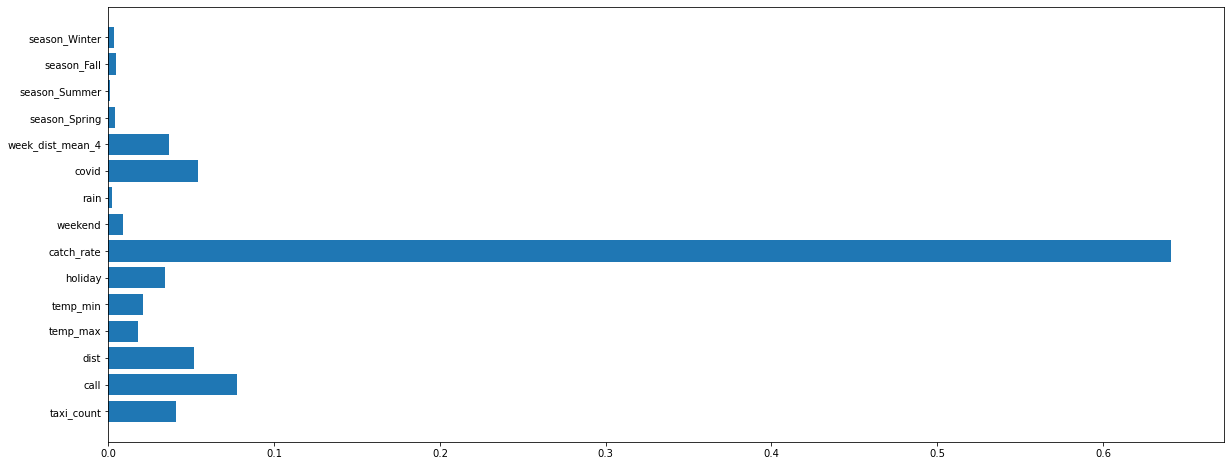

In [2501]:
plt.figure(figsize=(20,8))
plt.barh(list(x_train),model.feature_importances_)
plt.show()

#### 2) 모델2

In [2502]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 아래에 실습코드를 작성하고 결과를 확인합니다.
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)


In [2503]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 아래에 실습코드를 작성하고 결과를 확인합니다.

print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred)**0.5)
print(r2_score(y_test,y_pred))
result['LinearRegression']= mean_absolute_error(y_test,y_pred)
result_mape['LinearRegression']= mean_absolute_percentage_error(y_test,y_pred)
result_r2['LinearRegression']= r2_score(y_test,y_pred)

3.4217606748338096
0.08433311166656864
4.200521308981365
0.5252401279542225


#### 3) 모델3

In [2504]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
model = XGBRegressor(random_state=1)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)


In [2505]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred)**0.5)
print(r2_score(y_test,y_pred))
result['XGBRegressor']= mean_absolute_error(y_test,y_pred)
result_mape['XGBRegressor']= mean_absolute_percentage_error(y_test,y_pred)
result_r2['XGBRegressor']= r2_score(y_test,y_pred)

3.1643507779299562
0.0739838884095995
4.200584724874173
0.525225792805698


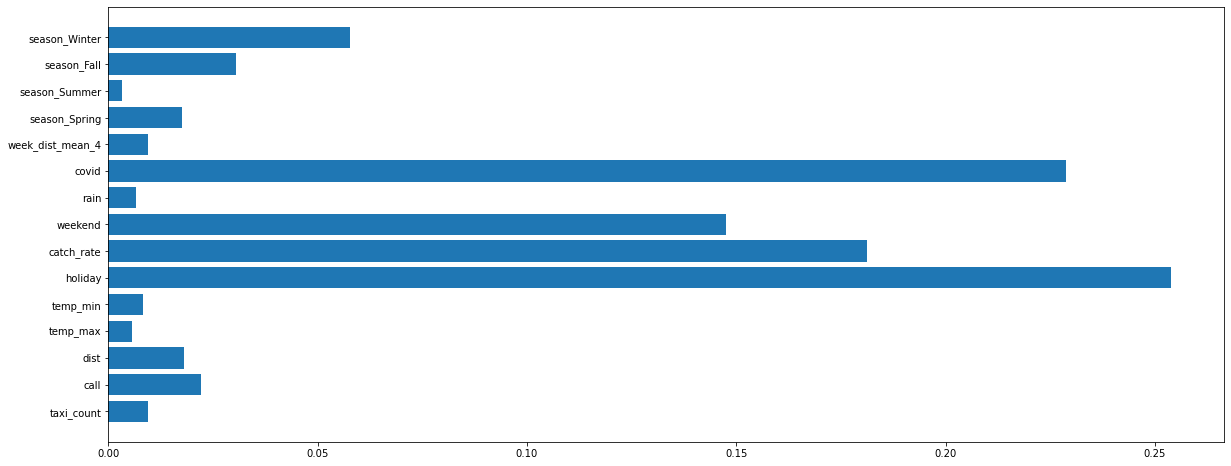

In [2506]:
plt.figure(figsize=(20,8))
plt.barh(list(x_train),model.feature_importances_)
plt.show()

#### 4) 모델4

In [2507]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
model = SVR()
model.fit(x_train_s,y_train)
y_pred = model.predict(x_test_s)


In [2508]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred)**0.5)
print(r2_score(y_test,y_pred))
result['SVR']= mean_absolute_error(y_test,y_pred)
result_mape['SVR']= mean_absolute_percentage_error(y_test,y_pred)
result_r2['SVR']= r2_score(y_test,y_pred)

4.992122197447097
0.11002011627053927
6.455506654523839
-0.12131668908970195


In [2509]:
model = KNeighborsRegressor()
model.fit(x_train_s,y_train)
y_pred = model.predict(x_test_s)

In [2510]:

print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred)**0.5)
print(r2_score(y_test,y_pred))
result['KNeighborsRegressor']= mean_absolute_error(y_test,y_pred)
result_mape['KNeighborsRegressor']= mean_absolute_percentage_error(y_test,y_pred)
result_r2['KNeighborsRegressor']= r2_score(y_test,y_pred)

5.665934065934066
0.12771094101731095
7.172366997836096
-0.38418018175856106


In [2511]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [2512]:
model = GaussianProcessRegressor(random_state=1)
model.fit(x_train_s,y_train)
y_pred = model.predict(x_test_s)

In [2513]:
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred)**0.5)
print(r2_score(y_test,y_pred))
result['KNeighborsRegressor']= mean_absolute_error(y_test,y_pred)

88.73228787008551
2.158359343791495
189.36629007525272
-963.8792380149222


In [2514]:
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor ,GradientBoostingRegressor

In [2515]:
from sklearn.ensemble import StackingRegressor, VotingRegressor

In [2516]:
model = AdaBoostRegressor(random_state=1)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [2517]:
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred)**0.5)
print(r2_score(y_test,y_pred))
result['AdaBoostRegressor']= mean_absolute_error(y_test,y_pred)
result_mape['AdaBoostRegressor']= mean_absolute_percentage_error(y_test,y_pred)
result_r2['AdaBoostRegressor']= r2_score(y_test,y_pred)

3.8925485006535974
0.09030340480834247
4.76948567255932
0.38791643740243476


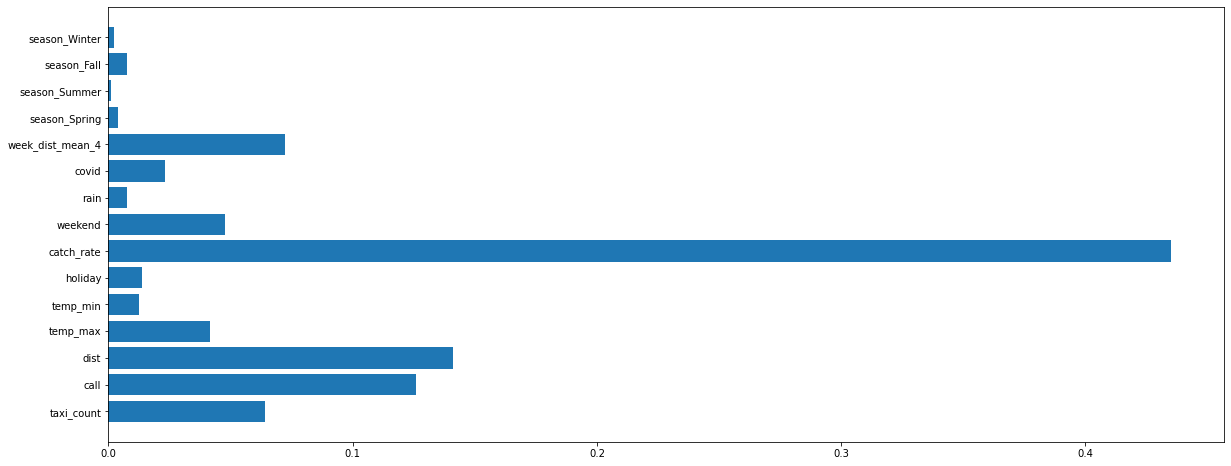

In [2518]:
plt.figure(figsize=(20,8))
plt.barh(list(x_train),model.feature_importances_)
plt.show()

In [2519]:
model = BaggingRegressor(random_state=1)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [2520]:
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred)**0.5)
print(r2_score(y_test,y_pred))
result['BaggingRegressor']= mean_absolute_error(y_test,y_pred)
result_mape['BaggingRegressor']= mean_absolute_percentage_error(y_test,y_pred)
result_r2['BaggingRegressor']= r2_score(y_test,y_pred)

3.4398901098901096
0.08181386561128053
4.643438830847691
0.41984094176372344


In [2550]:
model = ExtraTreesRegressor(random_state=1)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [2551]:
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred)**0.5)
print(r2_score(y_test,y_pred))
result['ExtraTreesRegressor']= mean_absolute_error(y_test,y_pred)
result_mape['ExtraTreesRegressor']= mean_absolute_percentage_error(y_test,y_pred)
result_r2['ExtraTreesRegressor']= r2_score(y_test,y_pred)

2.9315384615384597
0.06819968014698312
3.7228190311189606
0.627083610809544


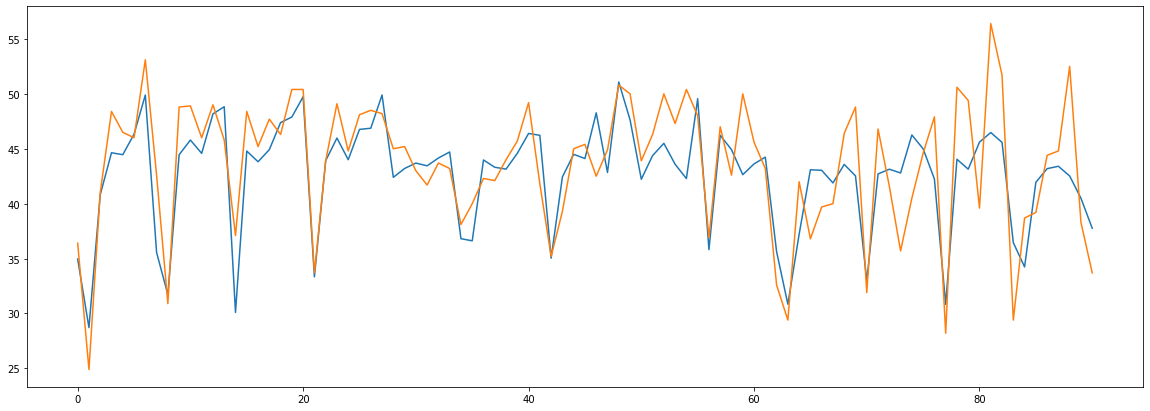

In [2556]:
plt.figure(figsize=(20,7))
plt.plot(y_pred)
plt.plot(y_test.values)


In [2523]:
data_f.shape

(2923, 16)

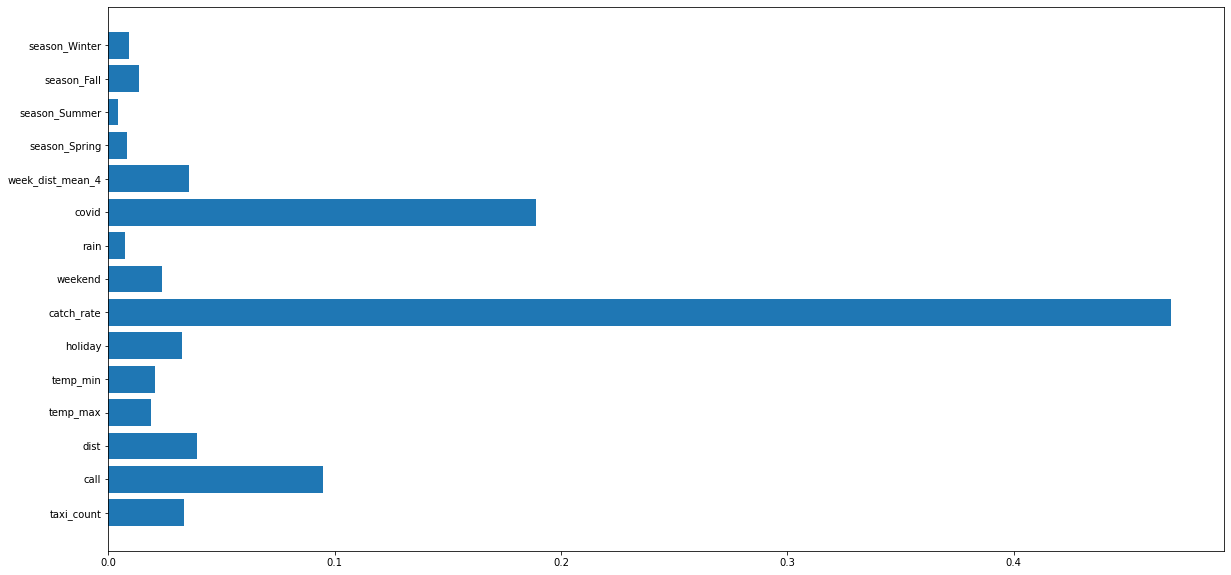

In [2524]:
plt.figure(figsize=(20,10))
plt.barh(list(x_train),model.feature_importances_)
plt.show()

In [2525]:

model = GradientBoostingRegressor(random_state=1)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [2526]:
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred)**0.5)
print(r2_score(y_test,y_pred))
result['GradientBoostingRegressor']= mean_absolute_error(y_test,y_pred)
result_mape['GradientBoostingRegressor']= mean_absolute_percentage_error(y_test,y_pred)
result_r2['GradientBoostingRegressor']= r2_score(y_test,y_pred)

3.6667926363630015
0.08312145374834996
4.734858504448873
0.396771808180051


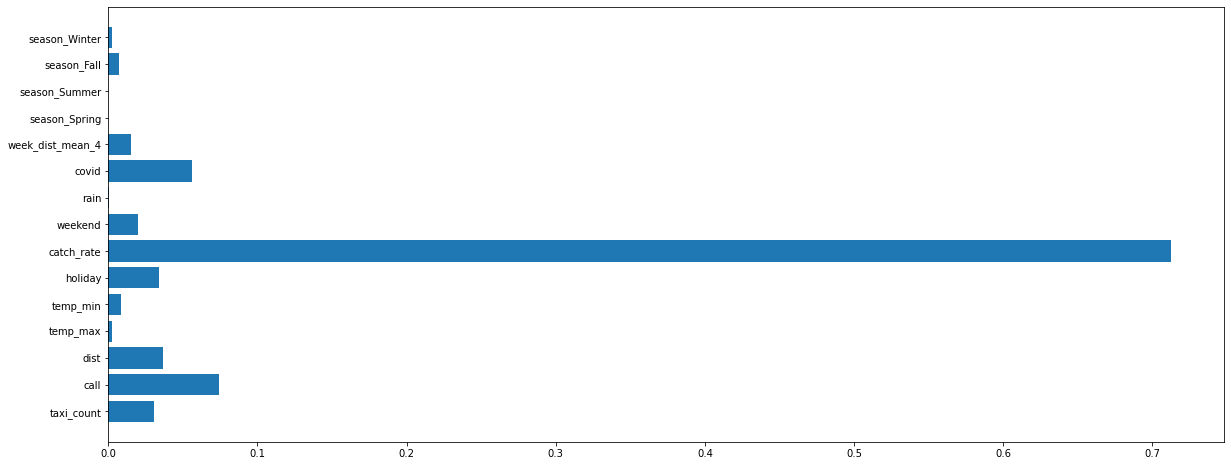

In [2527]:
plt.figure(figsize=(20,8))
plt.barh(list(x_train),model.feature_importances_)
plt.show()

In [2528]:
estimators = [('li', LinearRegression()),('svr', SVR()) ]

model = StackingRegressor(estimators=estimators)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [2529]:
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred)**0.5)
print(r2_score(y_test,y_pred))
result['StackingRegressor']= mean_absolute_error(y_test,y_pred)
result_mape['StackingRegressor']= mean_absolute_percentage_error(y_test,y_pred)
result_r2['StackingRegressor']= r2_score(y_test,y_pred)

3.788787860109193
0.09423835707619414
4.780622371990458
0.3850546827118616


In [2530]:
model = VotingRegressor(estimators=estimators)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [2531]:
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred)**0.5)
print(r2_score(y_test,y_pred))
result['VotingRegressor']= mean_absolute_error(y_test,y_pred)
result_mape['VotingRegressor']= mean_absolute_percentage_error(y_test,y_pred)
result_r2['VotingRegressor']= r2_score(y_test,y_pred)

3.2369201995799433
0.07444270206823489
4.012748411297776
0.5667371195770965


In [2532]:
from sklearn.naive_bayes import GaussianNB

## 3.모델별 비교
* **세부요구사항**
    * 모델링 단계에서 생성한 모든 모델의 성능을 하나로 모아서 비교합니다.
    * 가장 성능이 높은 모델을 선정합니다.

In [2533]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data_f.columns

Index(['taxi_count', 'call', 'wait_time', 'dist', 'temp_max', 'temp_min',
       'holiday', 'catch_rate', 'weekend', 'rain', 'covid', 'week_dist_mean_4',
       'season_Spring', 'season_Summer', 'season_Fall', 'season_Winter'],
      dtype='object')

In [2534]:

# 성능 비교
print("MAE")
print('=' * 40)
for m_name, score in result.items():
    print(m_name, score.round(3))
print('=' * 40)

MAE
RandomForestRegressor 3.135
LinearRegression 3.422
XGBRegressor 3.164
SVR 4.992
KNeighborsRegressor 88.732
AdaBoostRegressor 3.893
BaggingRegressor 3.44
ExtraTreesRegressor 2.932
GradientBoostingRegressor 3.667
StackingRegressor 3.789
VotingRegressor 3.237


In [2535]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 성능 비교
print("MAPE")
print('=' * 40)
for m_name, score in result_mape.items():
    print(m_name, score.round(3))
print('=' * 40)

MAPE
RandomForestRegressor 0.074
LinearRegression 0.084
XGBRegressor 0.074
SVR 0.11
KNeighborsRegressor 0.128
AdaBoostRegressor 0.09
BaggingRegressor 0.082
ExtraTreesRegressor 0.068
GradientBoostingRegressor 0.083
StackingRegressor 0.094
VotingRegressor 0.074


In [2536]:
# 성능 비교
print("R2")
print('=' * 40)
for m_name, score in result_r2.items():
    print(m_name, score.round(3))
print('=' * 40)

R2
RandomForestRegressor 0.557
LinearRegression 0.525
XGBRegressor 0.525
SVR -0.121
KNeighborsRegressor -0.384
AdaBoostRegressor 0.388
BaggingRegressor 0.42
ExtraTreesRegressor 0.627
GradientBoostingRegressor 0.397
StackingRegressor 0.385
VotingRegressor 0.567


In [2547]:
param = {
    'n_estimators':range(20,150,5),
    'max_depth':range(3,6),
}

In [2548]:
GB = ExtraTreesRegressor()
model = GridSearchCV(GB,param,cv=10,scoring='r2')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [2549]:
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred)**0.5)
print(r2_score(y_test,y_pred))

4.781567444278168
0.10598248734591896
5.90987688518863
0.06022370273197597


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MSE
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau


class ForecastLSTM:
    def __init__(self, random_seed: int = 1):
        self.random_seed = random_seed

In [ ]:
data = joblib.load('data1.plk') 
data.shape

In [ ]:
data['rain'] = data['rain(mm)']
data['rain'] = data['rain'].map(lambda x: 1 if x>15 else 0 )
data['weekend'] =  data['Date'].dt.weekday
data['weekend'] = data['weekend'].map(lambda x: 1 if x==5 or x==6 else 0 )
data['cold'] = data['temp_max']
data['cold'] = data['temp_max'].map(lambda x: 1 if x<0 else 0 )
data['hot'] = data['temp_max']
data['hot'] = data['temp_max'].map(lambda x: 1 if x>31 else 0 )

start_date = '2020-01-20'
end_date = '2023-05-11'
data['covid'] = 0  
data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date), 'covid'] = 1

def add_basic_fare(year):
    if 2012 == year:
        return 2400
    elif 2013 <= year <2019:
        return 3000
    elif year >= 2019:
        return 3800
    else:  # 나머지 경우는 0으로 처리
        return 0
data['기본요금'] = data['year'].apply(add_basic_fare)
data['week_dist_mean'] = data['dist'].rolling(window=4,min_periods=1).mean()

In [ ]:
data_lstm = data.copy()

In [ ]:
# x와 y 분리
data_lstm = pd.get_dummies(data_lstm, columns=['weekday','season'])

x = data_lstm.drop('wait_time',axis=1)
y = data_lstm['wait_time']

In [ ]:
dates = pd.to_datetime(data_lstm['Date'])

In [ ]:
# variables for training
cols = list(data_lstm)[1:]

# new dataframe with only training data - 5 columns
stock_data = data_lstm[cols].astype(float)
stock_data.drop(['week', 'month','year','sunshine(MJ/m2)','기본요금','humidity_min(%)','humidity_max(%)','rain(mm)'],axis=1, inplace=True)
stock_data

In [ ]:
n_train = -92
train_dates = dates[0: n_train]
test_dates = dates[n_train:]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(stock_data.iloc[0: n_train,:])
test_data_scaled = scaler.transform(stock_data.iloc[n_train:,:])

train_data_scaled.shape


In [ ]:
pred_days = 1  # prediction period
seq_len = 7   # sequence length = past days for future prediction.
input_dim = 34

In [ ]:

trainX = []
trainY = []
testX = []
testY = []

for i in range(seq_len, 2831-pred_days +1):
    trainX.append(train_data_scaled[i - seq_len:i, 0:train_data_scaled.shape[1]])
    trainY.append(train_data_scaled[i + pred_days - 1:i + pred_days, 0])

for i in range(seq_len, 92-pred_days +1):
    testX.append(test_data_scaled[i - seq_len:i, 0:test_data_scaled.shape[1]])
    testY.append(test_data_scaled[i + pred_days - 1:i + pred_days, 0])


In [ ]:
trainX, trainY = np.array(trainX), np.array(trainY)
testX, testY = np.array(testX), np.array(testY)

# print(trainX.shape, trainY.shape)
# print(testX.shape, testY.shape)

# LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(trainX.shape[1], trainX.shape[2]), # (seq length, input dimension)
               return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(trainY.shape[1]))

model.summary()

# specify your learning rate
learning_rate = 0.01
# create an Adam optimizer with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)
# compile your model using the custom optimizer
model.compile(optimizer=optimizer, loss='mae')

# Try to load weights
try:
    model.load_weights('./save_weights/lstm_weights.h5')
    print("Loaded model weights from disk")
except:
    print("No weights found, training model from scratch")
    # Fit the model
    history = model.fit(trainX, trainY, epochs=30, batch_size=32,
                    validation_split=0.1, verbose=1)
    # Save model weights after training
    model.save_weights('./lstm_weights.h5')

    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.legend()
    plt.show()


# prediction
prediction = model.predict(testX)
print(prediction.shape, testY.shape)

# generate array filled with means for prediction
mean_values_pred = np.repeat(scaler.mean_[np.newaxis, :], prediction.shape[0], axis=0)

# substitute predictions into the first column
mean_values_pred[:, 0] = np.squeeze(prediction)

# inverse transform
y_pred = scaler.inverse_transform(mean_values_pred)[:,0]
print(y_pred.shape)



In [ ]:
print(mean_absolute_error(testY,y_pred))
print(mean_absolute_percentage_error(testY,y_pred))
print(r2_score(testY,y_pred))

In [ ]:
prediction

In [ ]:
y_pred

In [ ]:
testY

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

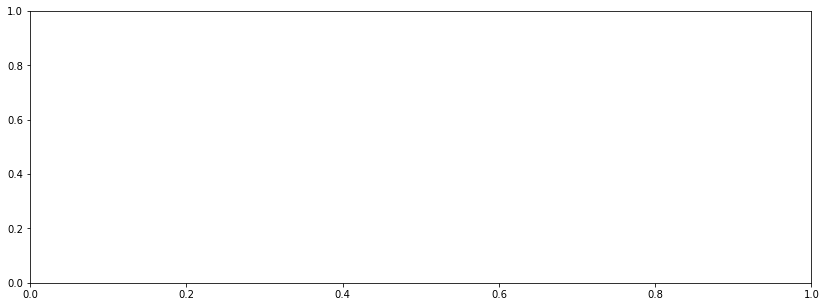

In [766]:
plt.figure(figsize=(14, 5))

# plot original 'Open' price

plt.plot(test_dates, y_pred)
plt.plot(test_dates[seq_len:], y_pred, color='red', linestyle='--', label='Predicted Open Price')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Original, Actual and Predicted Open Price')
plt.legend()
plt.show()


In [ ]:
# Calculate the start and end indices for the zoomed plot
zoom_start = len(test_dates) - 50
zoom_end = len(test_dates)
# Create the zoomed plot
plt.figure(figsize=(14, 5))

# Adjust the start index for the testY_original and y_pred arrays
adjusted_start = zoom_start - seq_len

plt.plot(test_dates[zoom_start:zoom_end],
         testY_original[adjusted_start:zoom_end - zoom_start + adjusted_start],
         color='blue',
         label='Actual Open Price')

plt.plot(test_dates[zoom_start:zoom_end],
         y_pred[adjusted_start:zoom_end - zoom_start + adjusted_start ],
         color='red',
         linestyle='--',
         label='Predicted Open Price')

plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Zoomed In Actual vs Predicted Open Price')
plt.legend()
plt.show()